
## Mulitple Linear Regression
### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading and Understanding Data

In [2]:
bike_df = pd.read_csv('day.csv')
#reading the data
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### Dataset has 730 rows and 16 columns

In [3]:
bike_df.shape #checking the size of the data

(730, 16)

In [4]:
bike_df.info() #checking out for detailed info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# We find there are no null values

In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike_df.size #describes the total size of the dataset

11680

## Data Cleaning

### Drop columns that are not useful for data analysis
- instant:as it is the record index
- dteday: as the features of date are alreeady there like yr month and weekday
- casual and registered as the are in cnt, because cnt is sum of both the values

In [7]:
bike_df.isnull().sum() #checking for missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bike_df.drop(['instant'],axis=1,inplace=True)
#dropping instant column as it is merely a index column which has no significance for our target

In [9]:
bike_df.drop(['dteday'],axis=1,inplace=True)
#dteday is not useful as month and weekday are covering it

bike_df.drop(['casual'],axis=1,inplace=True)
bike_df.drop(['registered'],axis=1,inplace=True)
#Removing casual and registered as cnt is sum of these

 Inspecting data after dropping 

In [10]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bike_df.columns #identifying all the column headers

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


So from the above correlation formed we can clearly see that season,month and weekday which are supposed 
to be non-numerical are numerical which should be changed 


### Handling outliers

In [13]:
bike_df.nunique() #gives info about unique values present in data

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

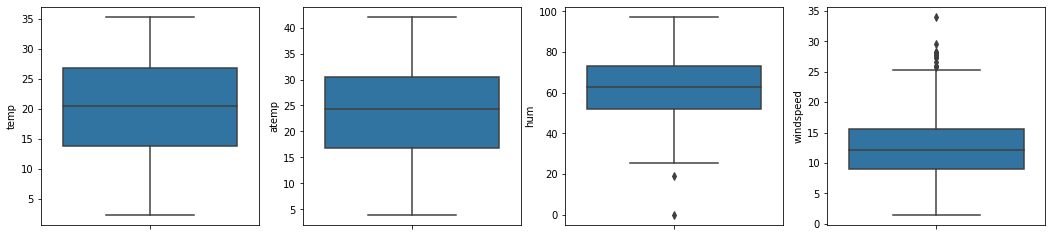

In [14]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

So from the above plots it is clear that we don't have much outliers

## EDA

In [15]:
#changing categorical data which were primarily numeric to more meaningful one
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_df.mnth = bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_df.weekday = bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Drawing pairplots to check for linear relationship

<Figure size 1080x2160 with 0 Axes>

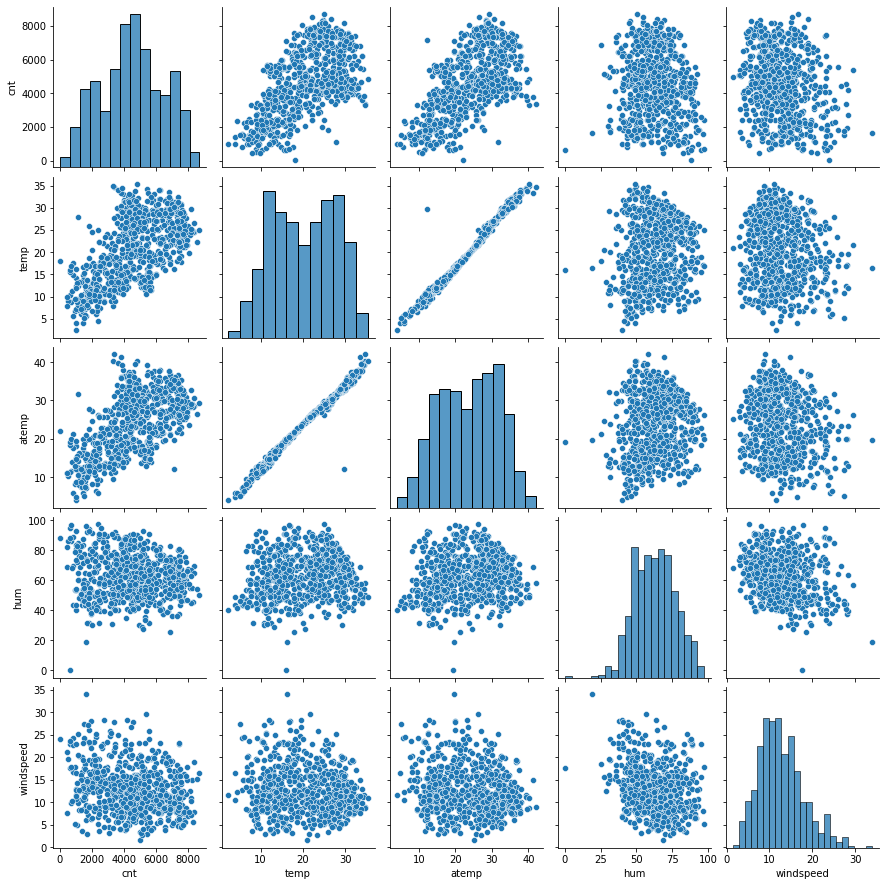

In [16]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- So from the above plots we can clearly understand that temp and atemp are having high correlation
- And from the plots we can also say that there is alinear relationship between TEMP and ATEMP

### Visualising data to find correlation from numerical variables

<Figure size 1440x1080 with 0 Axes>

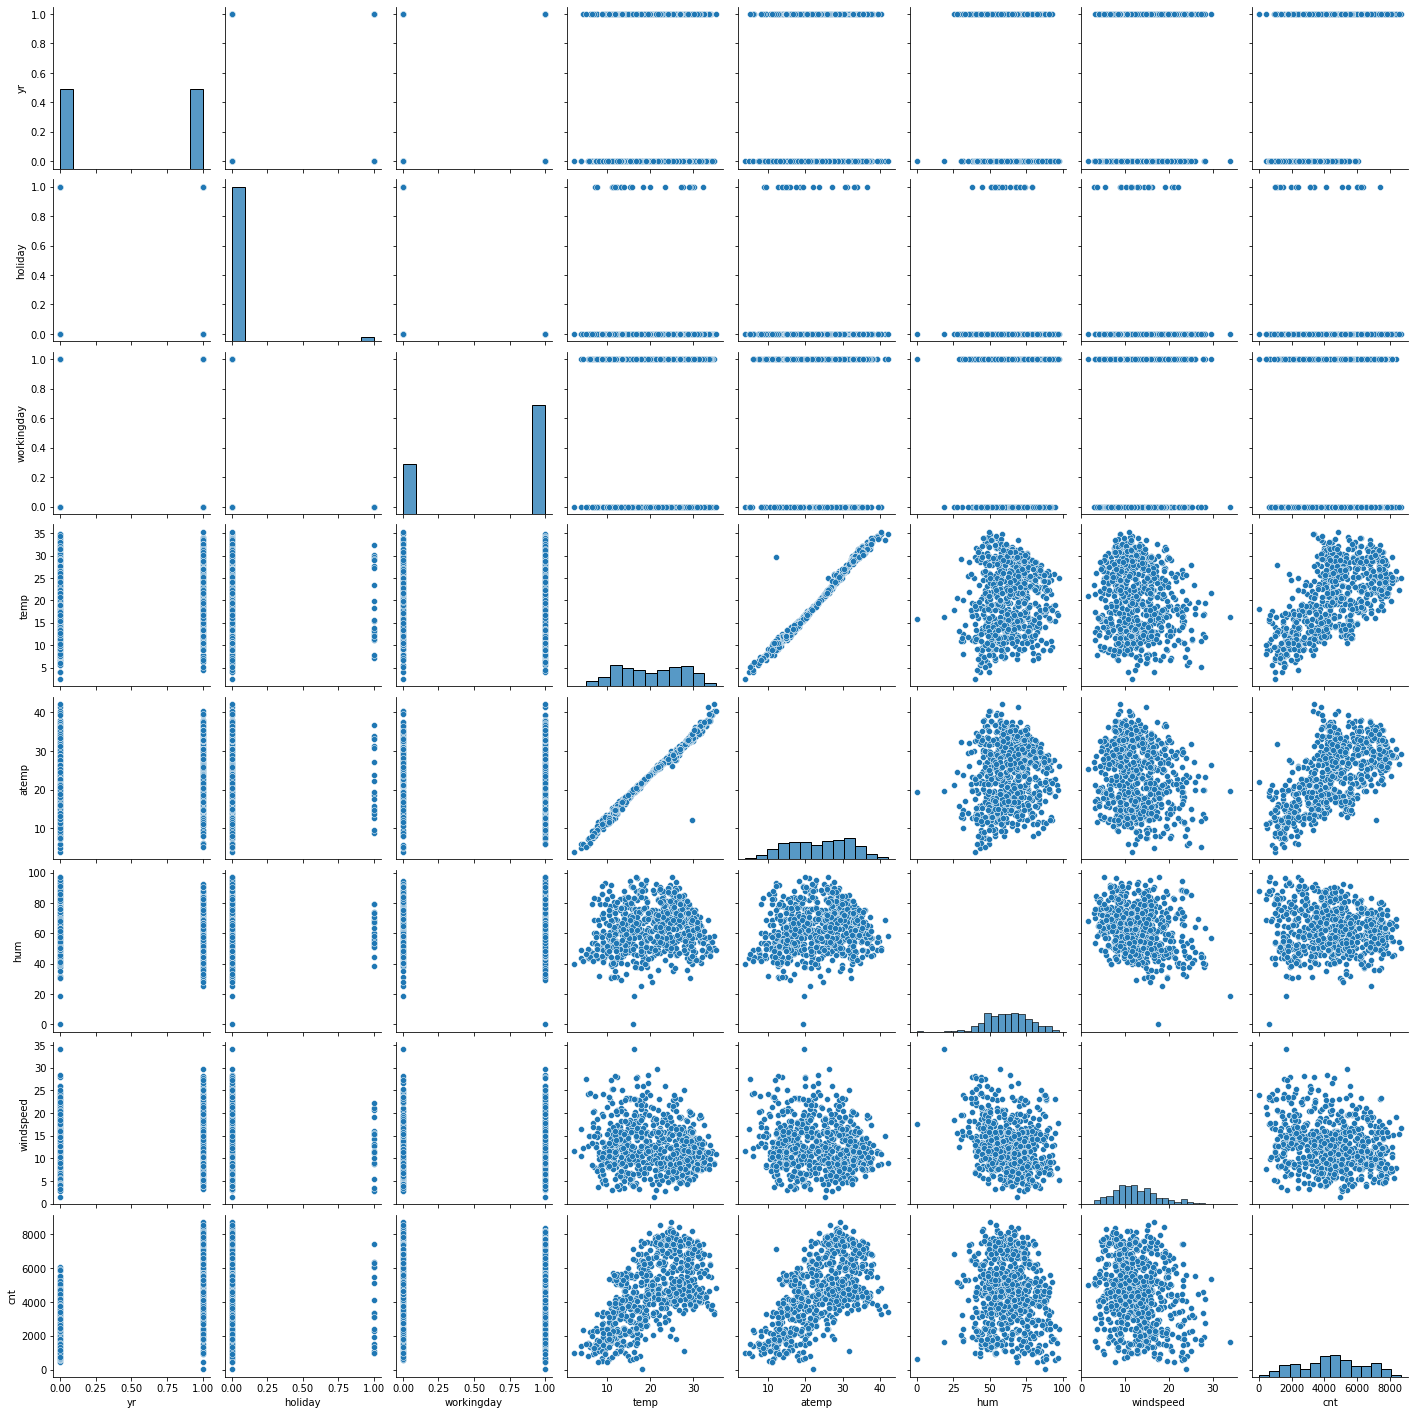

In [17]:
plt.figure(figsize=(20,15))
sns.pairplot(bike_df)
plt.show()

### Heatmap for correlation between numeric variables

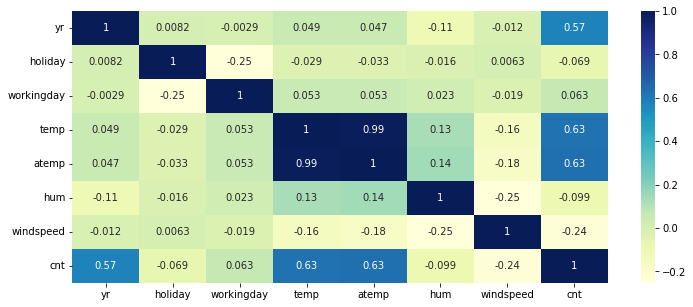

In [18]:
plt.figure(figsize=(12,5))
sns.heatmap(bike_df.corr(),cmap="YlGnBu",annot=True)
plt.show()

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

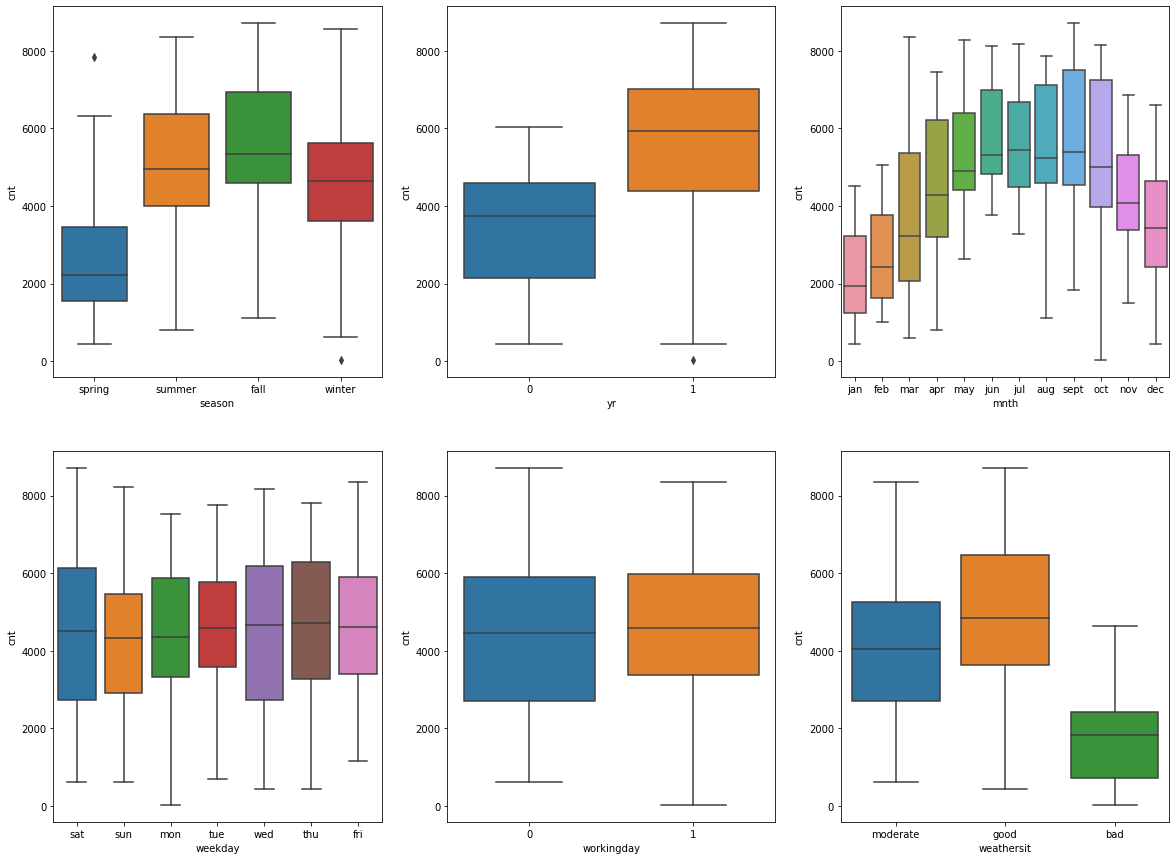

In [19]:
#visualising the categorical variables

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike_df)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_df)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bike_df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bike_df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_df)

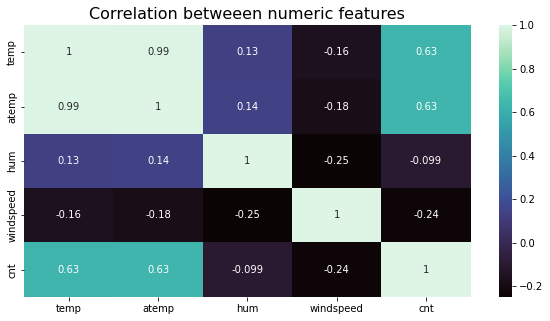

In [20]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(10,5))
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(bike_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

In [21]:
bike_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Data preparation for linear regression

Creating dummy variables for categorical variables

In [22]:
bike_df = pd.get_dummies(data=bike_df,columns=["season","mnth","weekday"],drop_first=True)
bike_df = pd.get_dummies(data=bike_df,columns=["weathersit"])

In [23]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


### Splitting data into train and test data

In [26]:
bike_df.shape

(730, 30)

In [27]:
#y to contain only target variable
y=bike_df.pop('cnt')

#X is all remainign variable also our independent variables
X=bike_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

KeyError: 'cnt'

In [28]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [29]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


In [30]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [31]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,0,0,1,0,0,1


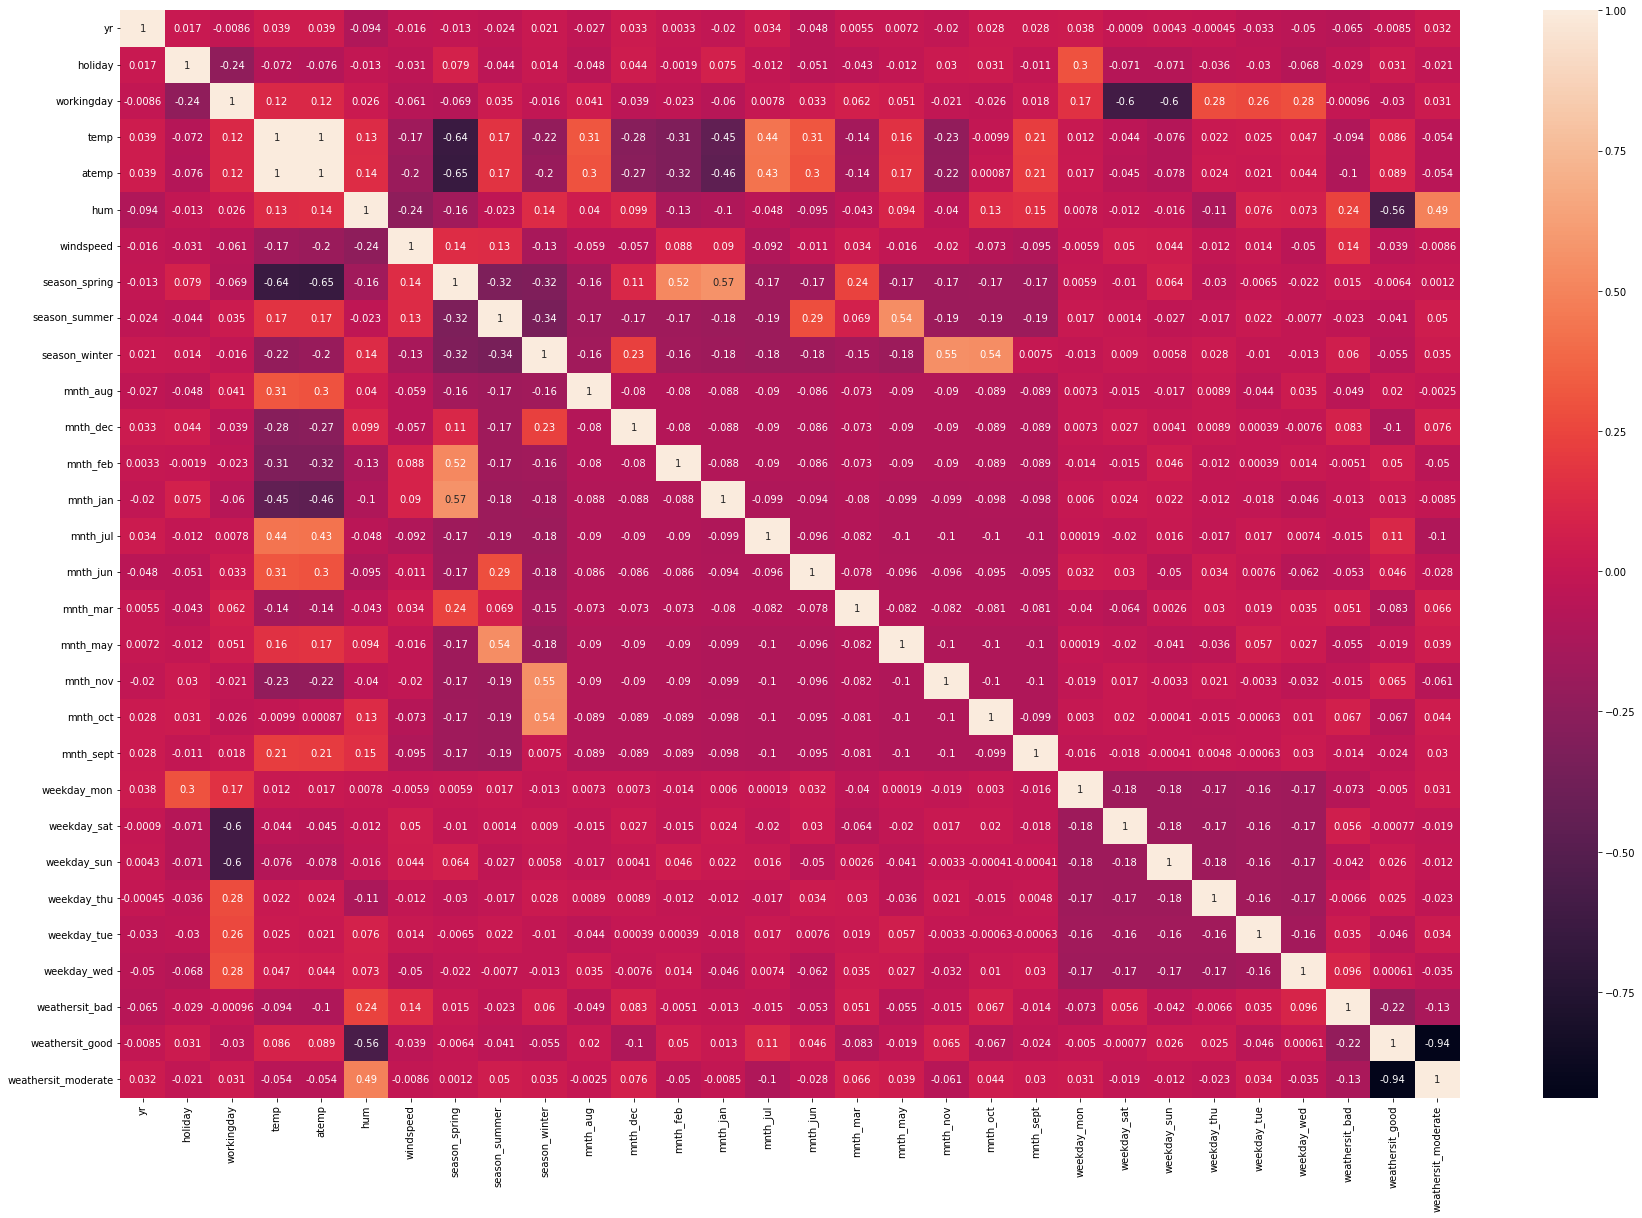

In [33]:
plt.figure(figsize = (30, 20))  #Checking if the variables are highly correlated
sns.heatmap(X_train.corr(), annot = True)
plt.show()

### Build model using RFE

In [34]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [36]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 15),
 ('mnth_jul', False, 3),
 ('mnth_jun', False, 16),
 ('mnth_mar', False, 5),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 7),
 ('mnth_sept', False, 2),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 13),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [37]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [38]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [39]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_dec', 'mnth_nov', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [40]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['temp', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [41]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [42]:
X_train_rfe.shape


(511, 15)

## Model-1

In [43]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.52e-183
Time:                        21:17:20   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

### Model-2

In [44]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.59e-184
Time:                        21:17:24   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    

### Model-3

In [45]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.46e-181
Time:                        21:17:27   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    

### Model-4

In [46]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          4.56e-182
Time:                        21:17:30   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

### Model-5

In [47]:
# Dropping the variable mnth_jul,temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.57e-182
Time:                        21:17:33   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

### Model-6

In [48]:
## Trying to replace July with spring as both were highly correlated
#removing of working_day,Summer and adding temp

cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']
build_model(cols6)
get_vif(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.33e-179
Time:                        21:17:36   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.82
Hence we finalize this model to use further

In [49]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [50]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_train[cols6],y_train)
print(lr.intercept_,lr.coef_)

1849.3111141436211 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


### Residual Analysis

In [51]:
y_train_pred = lr.predict(X_train[cols6])

In [52]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

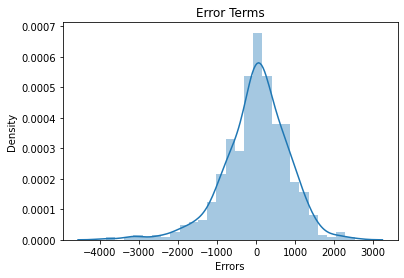

In [53]:
plot_res_dist(y_train, y_train_pred)

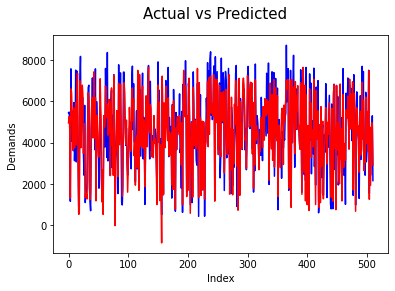

In [54]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## Model Predictions

## R-Squared value for train predictions

In [55]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8185359364498817

### Prediction of values on test dataset

In [56]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [57]:
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols6])

## R-Squared value for test predictions

In [58]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8159036088393238

## Evaluating the model

In [59]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.8159036088393238

Text(0, 0.5, 'y_pred')

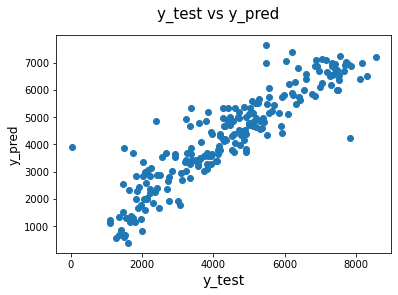

In [60]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [61]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

lm = build_model(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.33e-179
Time:                        21:18:06   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

### Conclusion
Significant variables to predict the demand for shared bikes

- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year
- Sunday
- weathersit( Light Snow, Mist + Cloud